<a href="https://colab.research.google.com/github/IvanStukalov/MLTechnologies/blob/lab_4/lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

from sklearn.model_selection import train_test_split
from seaborn import load_dataset

In [ ]:
# Загрузка датасета
ds = load_dataset('penguins')
df = ds.dropna()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Создаем экземпляр LabelEncoder
encoder = LabelEncoder()

# Кодируем категориальный признак 'species'
df['species'] = encoder.fit_transform(df['species'])
df['island'] = encoder.fit_transform(df['island'])
df['sex'] = encoder.fit_transform(df['sex'])

<ipython-input-76-4a2bf69bec95>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['species'] = encoder.fit_transform(df['species'])
<ipython-input-76-4a2bf69bec95>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['island'] = encoder.fit_transform(df['island'])
<ipython-input-76-4a2bf69bec95>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

In [ ]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
4,0,2,36.7,19.3,193.0,3450.0,0
5,0,2,39.3,20.6,190.0,3650.0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    int64  
 1   island             333 non-null    int64  
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 20.8 KB


<Axes: xlabel='bill_length_mm', ylabel='species'>

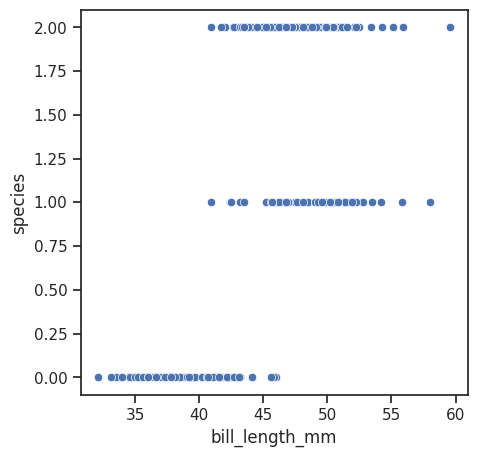

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(ax=ax, x='bill_length_mm', y='species', data=df)

In [ ]:
# Выбор признаков
ds_x = df.drop('species', axis = 1)
ds_y = df['species']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(ds_x, ds_y, test_size=0.2, random_state=1)

### линейная регрессия

In [ ]:

from sklearn.linear_model import LogisticRegression

reg1 = LogisticRegression().fit(ds_x, ds_y)
reg1

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
pred_y_test = reg1.predict(X_test)

In [100]:
from sklearn.metrics import accuracy_score, recall_score

accuracy_score(y_test, pred_y_test)

1.0

In [102]:
recall_score(y_test, pred_y_test, average='macro')

1.0

### SVM


In [ ]:
from sklearn.svm import SVC

# Обучение SVM классификатора
clf = SVC()
clf.fit(X_train, y_train)

SVC()

In [105]:
from sklearn.metrics import accuracy_score, classification_report

# Предсказание на тестовой выборке
y_pred = clf.predict(X_test)

# Анализ точности
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность: {accuracy:.2f}")


Точность: 0.63


In [106]:
recall_score(y_test, y_pred, average='macro')

0.5584415584415584

### Desision tree

In [118]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz

tree_cl = DecisionTreeClassifier(random_state=1)
tree_cl.fit(ds_x, ds_y)
tree_cl

DecisionTreeClassifier(random_state=1)

In [120]:
from IPython.core.display import HTML
from sklearn.tree import export_text
tree_rules = export_text(tree_cl, feature_names=list(ds_x.columns))
HTML('<pre>' + tree_rules + '</pre>')

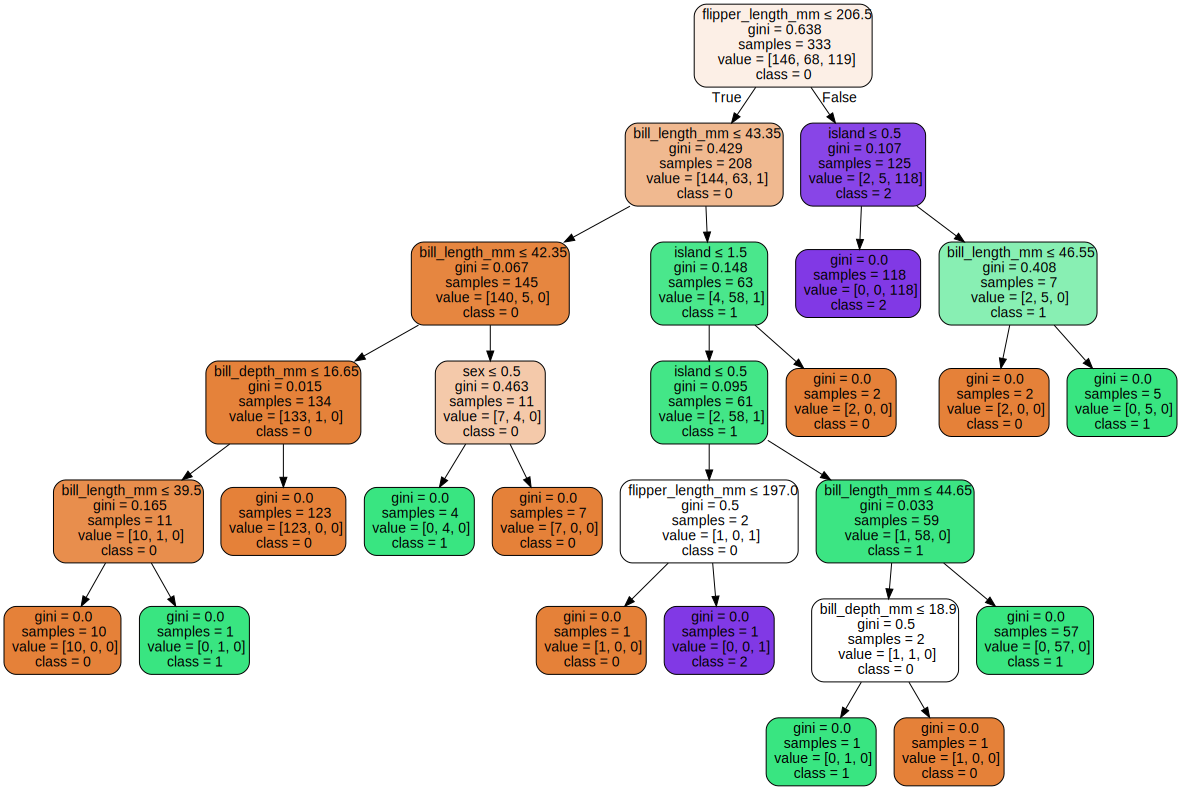

In [123]:
import graphviz
from sklearn.tree import export_graphviz

class_names = [str(name) for name in ds_y.unique()]

dot_data = export_graphviz(tree_cl, out_file=None,
                           feature_names=ds_x.columns,
                           class_names=class_names,
                           filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(dot_data)
graph


In [124]:
pred_y_test_tree = tree_cl.predict(X_test)

In [126]:
accuracy_score(y_test, pred_y_test_tree)

1.0

In [127]:
recall_score(y_test, pred_y_test, average='macro')

1.0

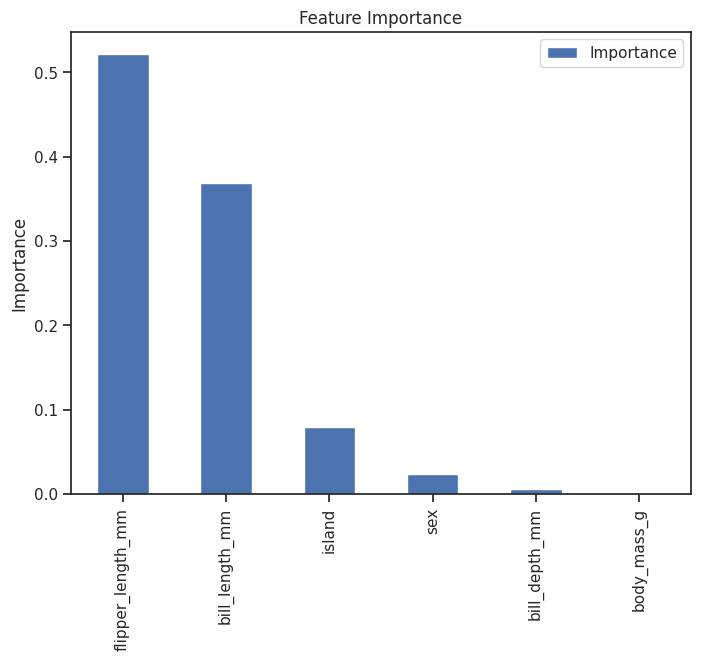

In [129]:
import matplotlib.pyplot as plt
import pandas as pd

# Предполагается, что model - это ваша обученная модель DecisionTreeClassifier
# и features_train - это DataFrame с признаками, использованными для обучения модели

# Получаем важность признаков
feature_importances = tree_cl.feature_importances_

# Создаем DataFrame с важностью признаков
feat_importances = pd.DataFrame(feature_importances, index=ds_x.columns, columns=["Importance"])

# Сортируем признаки по важности
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)

# Построение графика
feat_importances.plot(kind='bar', figsize=(8,6))
plt.title('Feature Importance')
plt.ylabel('Importance')
plt.show()
